In [25]:
import pandas as pd

# Load the dataset
file_path = "datasets/Valorant ISO Data manual.csv"
valorant_data = pd.read_csv(file_path)

print(valorant_data.head())

   Match Number  Round Number  Eco before purchase Drop Given to Teammate  \
0             1             1                  800                    NaN   
1             1             2                 3500                    NaN   
2             1             3                 3250                    NaN   
3             1             4                 4150                    NaN   
4             1             5                 3450                    NaN   

   Eco after purchase sidearms main weapon Shield type Friendly drop weapon  \
0                 100    Ghost         NaN         NaN                  NaN   
1                  50    Ghost   Guardian        Heavy                  NaN   
2                2250  Classic         NaN       Heavy             Guardian   
3                  50  Classic      Vandal       Heavy                  NaN   
4                3050  Classic      Vandal       Heavy                  NaN   

   Contingency Ability  Undercut Ability  kills round win/loss

In [26]:
# Checking for missing values
missing_values = valorant_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Match Number               0
Round Number               0
Eco before purchase        0
Drop Given to Teammate    65
Eco after purchase         0
sidearms                   0
main weapon               17
Shield type                8
Friendly drop weapon      59
Contingency Ability        0
Undercut Ability           0
kills                      0
round win/loss             0
match status               0
Side                       0
dtype: int64


In [27]:
# Replace NaN with "none" for 'Drop Given to Teammate' and 'Friendly drop weapon'
valorant_data["Drop Given to Teammate"].fillna("none", inplace=True)
valorant_data["Friendly drop weapon"].fillna("none", inplace=True)

# Verify replacements
print(valorant_data[["Drop Given to Teammate", "Friendly drop weapon"]].head())

  Drop Given to Teammate Friendly drop weapon
0                   none                 none
1                   none                 none
2                   none             Guardian
3                   none                 none
4                   none                 none


C:\Users\Ajesh_Laptop\AppData\Local\Temp\ipykernel_7040\835933176.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valorant_data["Drop Given to Teammate"].fillna("none", inplace=True)
C:\Users\Ajesh_Laptop\AppData\Local\Temp\ipykernel_7040\835933176.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [28]:
# Replace NaN with "none" for 'main weapon' and reassign explicitly
valorant_data["main weapon"] = valorant_data["main weapon"].fillna("none")

# Verify replacements
print(valorant_data[["main weapon"]].head())

  main weapon
0        none
1   Guardian 
2        none
3      Vandal
4      Vandal


In [29]:
# Replace NaN with "none" for 'Shield type'
valorant_data["Shield type"] = valorant_data["Shield type"].fillna("none")

# Verify replacements
print(valorant_data[["Shield type"]].head())

  Shield type
0        none
1       Heavy
2       Heavy
3       Heavy
4       Heavy


In [30]:
# Summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
print(valorant_data.describe())

# Value counts for categorical columns
categorical_columns = ["sidearms", "main weapon", "Shield type", "Side", "round win/loss", "match status"]
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(valorant_data[col].value_counts())

Summary Statistics for Numeric Columns:
       Match Number  Round Number  Eco before purchase  Eco after purchase  \
count     66.000000     66.000000            66.000000           66.000000   
mean       1.969697     11.560606          4071.969697         1366.666667   
std        0.840690      6.497642          1617.979005         1257.204877   
min        1.000000      1.000000           800.000000            0.000000   
25%        1.000000      6.000000          3287.500000          112.500000   
50%        2.000000     11.500000          4025.000000         1350.000000   
75%        3.000000     17.000000          4900.000000         2250.000000   
max        3.000000     24.000000          8250.000000         5250.000000   

       Contingency Ability  Undercut Ability      kills  
count            66.000000         66.000000  66.000000  
mean              0.909091          1.621212   1.212121  
std               0.289683          0.674027   1.295141  
min               0.00000

In [31]:
# Standardize categorical columns using map
for col in categorical_columns:
    valorant_data[col] = valorant_data[col].map(
        lambda x: x.lower().strip() if isinstance(x, str) else x
    )

# Verify standardization
print(valorant_data[categorical_columns].head())

  sidearms main weapon Shield type       Side round win/loss match status
0    ghost        none        none  defenders            win       defeat
1    ghost    guardian       heavy  defenders            win       defeat
2  classic        none       heavy  defenders           loss       defeat
3  classic      vandal       heavy  defenders            win       defeat
4  classic      vandal       heavy  defenders            win       defeat


In [32]:
# Identify rows where 'Eco after purchase' > 'Eco before purchase'
invalid_eco_rows = valorant_data[valorant_data["Eco after purchase"] > valorant_data["Eco before purchase"]]

# Print invalid rows, if any
print("Rows with Invalid Economy Logic:")
print(invalid_eco_rows)

Rows with Invalid Economy Logic:
Empty DataFrame
Columns: [Match Number, Round Number, Eco before purchase, Drop Given to Teammate, Eco after purchase, sidearms, main weapon, Shield type, Friendly drop weapon, Contingency Ability, Undercut Ability, kills, round win/loss, match status, Side]
Index: []


<Figure size 1000x600 with 0 Axes>

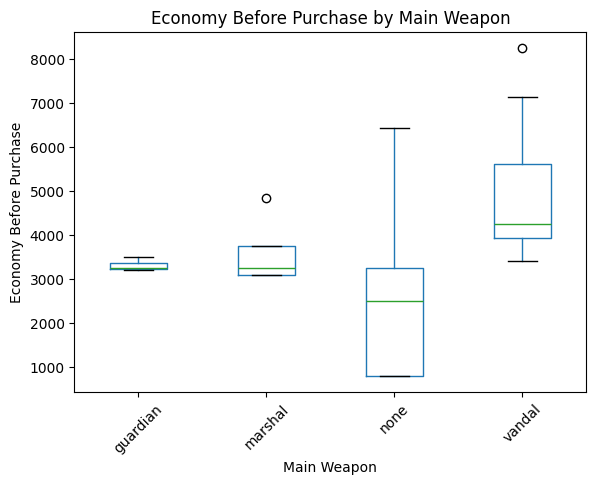

In [33]:
import matplotlib.pyplot as plt

# Boxplot: Economy before purchase by main weapon
plt.figure(figsize=(10, 6))
valorant_data.boxplot(column="Eco before purchase", by="main weapon", grid=False)
plt.title("Economy Before Purchase by Main Weapon")
plt.suptitle("")  # Remove default title
plt.xlabel("Main Weapon")
plt.ylabel("Economy Before Purchase")
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

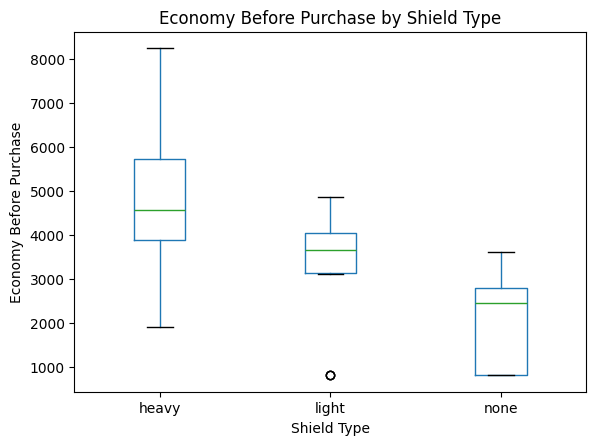

In [34]:
# Boxplot: Economy before purchase by Shield type
plt.figure(figsize=(8, 6))
valorant_data.boxplot(column="Eco before purchase", by="Shield type", grid=False)
plt.title("Economy Before Purchase by Shield Type")
plt.suptitle("")
plt.xlabel("Shield Type")
plt.ylabel("Economy Before Purchase")
plt.show()

<Figure size 800x600 with 0 Axes>

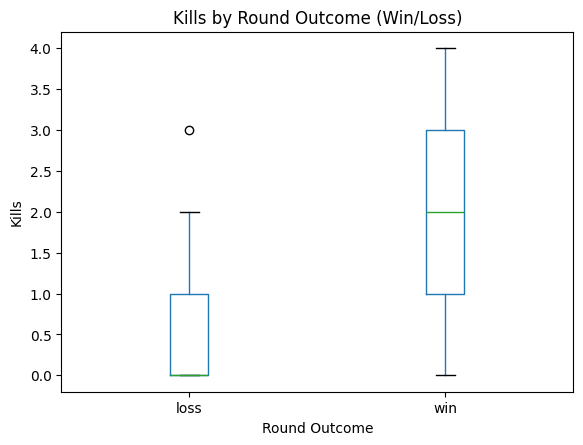

In [35]:
# Boxplot: Kills by round win/loss
plt.figure(figsize=(8, 6))
valorant_data.boxplot(column="kills", by="round win/loss", grid=False)
plt.title("Kills by Round Outcome (Win/Loss)")
plt.suptitle("")
plt.xlabel("Round Outcome")
plt.ylabel("Kills")
plt.show()

<Figure size 800x600 with 0 Axes>

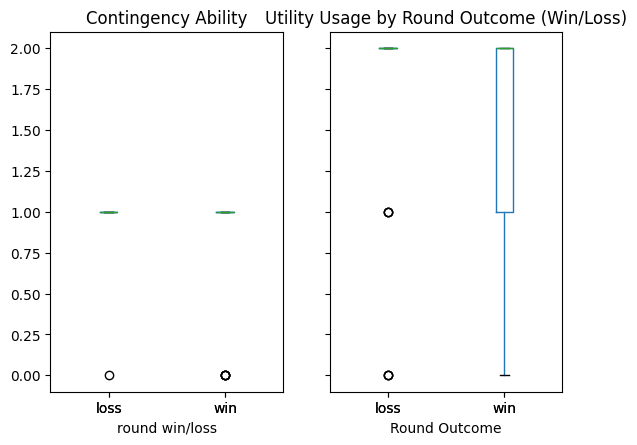

In [36]:
# Boxplot: Utility usage by round win/loss
plt.figure(figsize=(8, 6))
valorant_data.boxplot(column=["Contingency Ability", "Undercut Ability"], by="round win/loss", grid=False)
plt.title("Utility Usage by Round Outcome (Win/Loss)")
plt.suptitle("")
plt.xlabel("Round Outcome")
plt.ylabel("Utility Usage")
plt.show()

<Figure size 800x600 with 0 Axes>

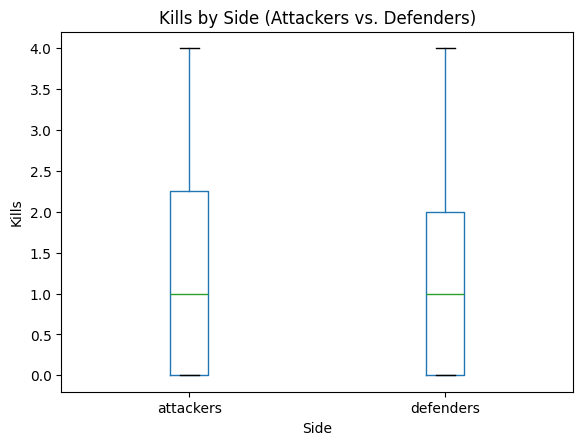

In [37]:
# Boxplot: Kills by side (Attackers/Defenders)
plt.figure(figsize=(8, 6))
valorant_data.boxplot(column="kills", by="Side", grid=False)
plt.title("Kills by Side (Attackers vs. Defenders)")
plt.suptitle("")
plt.xlabel("Side")
plt.ylabel("Kills")
plt.show()

In [38]:
valorant_data.to_csv("cleaned_valorant_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_valorant_data.csv'")

Cleaned dataset saved as 'cleaned_valorant_data.csv'
